In [177]:
from sklearn import decomposition
from sklearn import datasets
from sklearn import preprocessing
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
#from numpy import genfromtxt
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
import matplotlib
import random
%matplotlib inline

In [158]:
# creates a list of different colors do be used below
clist =[]
for name, hex in matplotlib.colors.cnames.items():
    clist.append(hex)

clist = np.array(clist)

In [159]:
# load iris data to test
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [160]:
# apply pca to iris data and create a vector of colors for each class
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
#[('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]
col = []
for x in list(y):
    if x==0:
        col.append('blue')
    elif x==1:
        col.append('red')
    else:
        col.append('green')


/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


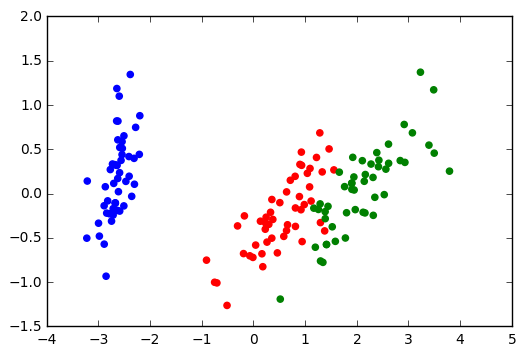

In [161]:
plt.scatter(X[:,0], X[:,1], color=col)

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

In [162]:
# how to retrieve the loading vector, notice that for
# this example we have loadings for 3 components, 4 variables
loadings = pca.components_
loadings.shape

(3, 4)

In [244]:
# Load example metabolomics data, and metadata
df = pd.read_csv('features_quantification_matrix (1).csv')
met = pd.read_csv('Metadata_BP-Microbiome_COMPLETE.csv')

In [245]:
# change sample name to match metadata
for i in range(df.shape[0]):
    df['Sample name'][i] = df['Sample name'][i].split("_")[0]



/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [255]:
# Concatenate data and metadata by Sample name
result = pd.merge(met, df, how='inner', left_on='Sample ID', right_on='Sample name')
result.shape

(2275, 5940)

In [249]:
# Choose metadada column to create colors
ids = np.array(result["Volunteer ID"])

In [250]:
# assign random color for each class
ks = list(Counter(ids).keys())
cvec = clist[random.sample(range(0, len(clist)), len(ks))]
print (Counter(ids))
cvec

Counter({'Volunteer 10': 306, 'Volunteer 9': 304, 'Volunteer 4': 289, 'Volunteer 6': 160, 'Volunteer 12': 160, 'Volunteer 11': 160, 'Volunteer 5': 160, 'Volunteer 3': 160, 'Volunteer 1': 160, 'Volunteer 2': 160, 'Volunteer 7': 160, 'Empty': 34, 'Volunteer 8': 32, 'Swab blank': 30})


array(['#90EE90', '#AFEEEE', '#0000FF', '#00FF00', '#008B8B', '#808080',
       '#EEE8AA', '#FFEFD5', '#48D1CC', '#191970', '#696969', '#00BFFF',
       '#FFFF00', '#F5FFFA'], 
      dtype='<U7')

In [251]:
# replace the class id (key) with color
for k in range(len(ks)):
    ids[list(np.where(ids == ks[k])[0])] = cvec[k]
    
ks

['Volunteer 6',
 'Volunteer 8',
 'Swab blank',
 'Empty',
 'Volunteer 12',
 'Volunteer 11',
 'Volunteer 5',
 'Volunteer 3',
 'Volunteer 1',
 'Volunteer 2',
 'Volunteer 7',
 'Volunteer 10',
 'Volunteer 9',
 'Volunteer 4']

In [252]:
Counter(ids)

Counter({'#0000FF': 30,
         '#008B8B': 160,
         '#00BFFF': 306,
         '#00FF00': 34,
         '#191970': 160,
         '#48D1CC': 160,
         '#696969': 160,
         '#808080': 160,
         '#90EE90': 160,
         '#AFEEEE': 32,
         '#EEE8AA': 160,
         '#F5FFFA': 289,
         '#FFEFD5': 160,
         '#FFFF00': 304})

In [256]:
# Take the metadata out to plot
result.drop(['Sample ID', 'Volunteer ID', 'Timepoint', 'Body part', 'Date of LC-MS/MS analysis', 'Sample name' ], inplace=True, axis=1)
result.head()


,89.506 600 1 (ID: 986),90.525 286 1 (ID: 5389),90.525 592 1 (ID: 5122),98.508 602 1 (ID: 1094),98.508 108 1 (ID: 3562),98.508 599 1 (ID: 633),98.509 155 1 (ID: 4319),98.510 603 1 (ID: 2406),98.510 85 1 (ID: 5651),98.511 132 1 (ID: 2007),...,1405.774 217 1 (ID: 3297),1405.978 466 1 (ID: 4005),1409.930 466 1 (ID: 3260),1410.933 466 1 (ID: 3264),1453.956 465 1 (ID: 3273),1454.958 465 1 (ID: 4896),1485.110 494 1 (ID: 4732),1486.113 482 1 (ID: 4733),1490.066 482 1 (ID: 4730),1497.982 463 1 (ID: 4988)
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.002762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [260]:
# TIC normalization
#for i in range(result.shape[0]):
#    result[i] = result.loc[i]/sum(result.loc[i])
#result = result.fillna(value=0)
result = result.div(result.sum(axis=1), axis=0)

In [270]:
help(preprocessing.scale)

Help on function scale in module sklearn.preprocessing.data:

scale(X, axis=0, with_mean=True, with_std=True, copy=True)
    Standardize a dataset along any axis
    
    Center to the mean and component wise scale to unit variance.
    
    Read more in the :ref:`User Guide <preprocessing_scaler>`.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}
        The data to center and scale.
    
    axis : int (0 by default)
        axis used to compute the means and standard deviations along. If 0,
        independently standardize each feature, otherwise (if 1) standardize
        each sample.
    
    with_mean : boolean, True by default
        If True, center the data before scaling.
    
    with_std : boolean, True by default
        If True, scale the data to unit variance (or equivalently,
        unit standard deviation).
    
    copy : boolean, optional, default True
        set to False to perform inplace row normalization and avoid a
        copy (if the i

In [271]:
# scale variables
result_scaled = preprocessing.scale(result)
result_scaled[1:5, 1:5]

array([[-0.02097031, -0.02097031, -0.0589119 , -0.02559062],
       [-0.02097031, -0.02097031, -0.0589119 , -0.02559062],
       [-0.02097031, -0.02097031, -0.0589119 , -0.02559062],
       [-0.02097031, -0.02097031, -0.0589119 , -0.02559062]])

In [274]:
# make sure scaling was done per variable
np.mean(result_scaled[:,1])
#np.var(result_scaled[:,1])

7.8081619314296724e-18

In [261]:
# do pca
pca = decomposition.PCA(n_components=3)
pca.fit(result)
X = pca.transform(result)

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


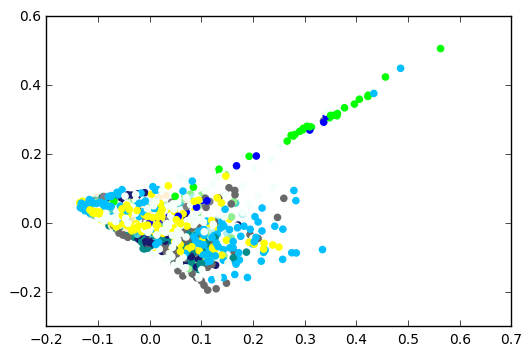

In [262]:
# plot with a color per class
plt.scatter(X[:,0], X[:,1], color=list(ids))

In [263]:
# load network file with structures do use latter here
# http://classyfire.wishartlab.com/entities/KRMDCWKBEZIMAB-UHFFFAOYSA-N.json
specnet = pd.read_csv('net/result_specnets_DB/eb3534f0b560452f9050473efd1c75f5.tsv',  sep='\t')
specnet.head()

,Compound_Name,Ion_Source,Instrument,Compound_Source,PI,Data_Collector,Adduct,Scan,Precursor_MZ,ExactMass,...,MQScore,Organism,TIC_Query,RT_Query,MZErrorPPM,SharedPeaks,MassDiff,LibMZ,SpecMZ,SpecCharge
0,1-Palmitoyl-2-oleoyl-sn-glycerol,ESI,IT/ion trap,Isolated,NIST,NIST,239.2,-1,239.200,0.00,...,0.752007,NIST14_library,14924.6,474.727,551.85500,5,0.132004,239.200,239.332,0
1,Massbank:FIO00484 Hesperidin,ESI,LC-ESI-QTOF,Isolated,Putative Massbank Match,Massbank,[M+H]+,-1,611.198,0.00,...,0.861364,MASSBANK,49412.3,190.865,26.16370,10,0.015991,611.198,611.182,0
2,Phytosphingosine,ESI,IT/ion trap,Isolated,NIST,NIST,265.3,-1,265.300,0.00,...,0.844577,NIST14_library,8062.7,457.078,177.14700,5,0.046997,265.300,265.253,0
3,(-)-Malyngolide,LC-ESI,qToF,Isolated,Dorrestein/Gerwick,Peng/Luzzatto/Garg,M+H,-1,271.000,270.22,...,0.711467,GNPS-LIBRARY,5635.2,416.780,815.52900,5,269.771000,271.000,271.221,0
4,"Massbank:EA066012 Galaxolidone|1,3,4,6,7,8-Hex...",ESI,LC-ESI-ITFT,Isolated,Putative Massbank Match,Massbank,[M+H]+,-1,273.185,0.00,...,0.888222,MASSBANK,11405.2,380.262,7.37288,6,0.002014,273.185,273.187,0


In [264]:
# take loadings
loadings = pca.components_

In [265]:
loadings.shape

(3, 5934)

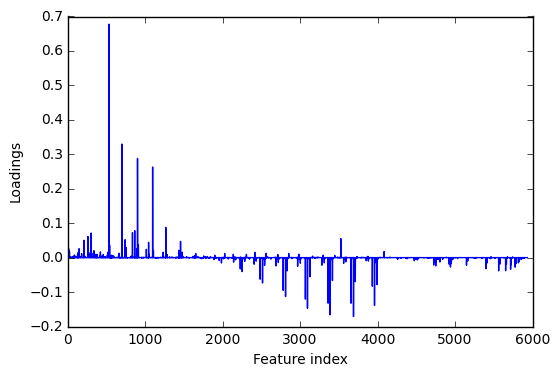

In [266]:
plt.plot(range(len(loadings[0,:])), loadings[0,:])
plt.ylabel('Loadings')
plt.xlabel('Feature index')

In [267]:
load_tab = pd.DataFrame([result.columns, loadings[0,:], loadings[1,:], loadings[2,:]])
load_tab = load_tab.T
load_tab = load_tab.sort([1], ascending=[False])

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [269]:
load_tab.head()

,0,1,2,3
3362,635.490 563 2 (ID: 20),-0.132374,0.091308,0.113859
3961,696.010 592 2 (ID: 26),-0.138934,0.0838211,0.126547
3096,608.947 550 2 (ID: 17),-0.146947,0.0931673,0.137341
3387,637.968 563 2 (ID: 14),-0.166001,0.105147,0.15552
3690,666.989 577 2 (ID: 15),-0.171079,0.107788,0.158246


In [230]:
load_tab.to_csv('features_quantification_matrix_PCA_loadings.csv', sep='\t', index_label='#SampleID', index = False)